In [133]:
import numpy as np
from keras.datasets import mnist
from sklearn import linear_model, preprocessing, metrics
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [59]:
# 1a - load dataset and transform to desired form
"""
Loading MNIST through Keras is easy. We can then transform the
data into the form described, AX = B, where A is the data matrix
of vectorized images, B is the binarized matrix of class labels,
and X represents our model mapping from image space to label space.
"""

# load mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# build data matrices
m, x, y = train_X.shape
train_A = np.reshape(train_X, (m,x*y))
train_A = train_A

m, x, y = test_X.shape
test_A = np.reshape(test_X, (m,x*y))
test_A = test_A

# build output matrices
lb = preprocessing.LabelBinarizer()
lb.fit(train_y)
train_B = lb.transform(train_y)

lb = preprocessing.LabelBinarizer()
lb.fit(test_y)
test_B = lb.transform(test_y)

Lasso training error: 0.058033726762576156
Lasso test set error: 0.05791847646055155


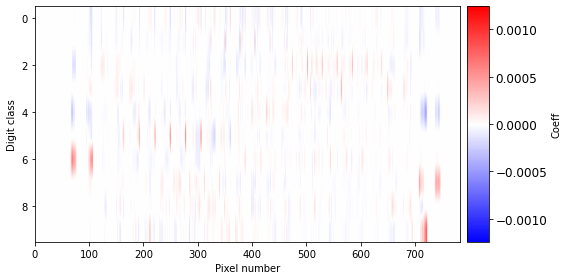

In [140]:
# 1b - solve Ax = b with Lasso
"""
"""

# dict to store error from different models
err_dict = dict()
err_dict["lasso"] = dict()

# solve with lasso
reg = linear_model.Lasso(alpha=0.1)
reg.fit(train_A, train_B)
X = reg.coef_.T

# look at results
train_pred = train_A @ X
train_err = metrics.mean_squared_error(train_B, train_pred)
print(f"Lasso training error: {train_err}")

test_pred = test_A @ X
test_err = metrics.mean_squared_error(test_B, test_pred)
print(f"Lasso test set error: {test_err}")

err_dict["lasso"]["train_err"] = train_err
err_dict["lasso"]["test_err"] = test_err
err_dict["lasso"]["X"] = np.array(X)

# visualize model
plot_mapping(X)

Pseudo-inverse training error: 0.03910037240057712
Pseudo-inverse test set error: 0.039518815962724954


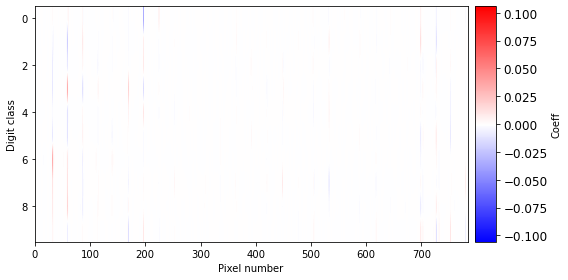

In [141]:
# 1c - solve Ax = b with pseudo-inverse
"""
"""

# dict to store error from different models
err_dict["pinv"] = dict()

# solve with pseudo-inverse
X = np.linalg.pinv(train_A) @ train_B

# look at results
train_pred = train_A @ X
train_err = metrics.mean_squared_error(train_B, train_pred)
print(f"Pseudo-inverse training error: {train_err}")

test_pred = test_A @ X
test_err = metrics.mean_squared_error(test_B, test_pred)
print(f"Pseudo-inverse test set error: {test_err}")

err_dict["pinv"]["train_err"] = train_err
err_dict["pinv"]["test_err"] = test_err
err_dict["pinv"]["X"] = np.array(X)

# visualize model
plot_mapping(X)

In [ ]:
# 1d - solve Ax = b with 
"""
"""

# dict to store error from different models
err_dict["pinv"] = dict()

# solve with pseudo-inverse
X = np.linalg.pinv(train_A) @ train_B

# look at results
train_pred = train_A @ X
train_err = metrics.mean_squared_error(train_B, train_pred)
print(f"Pseudo-inverse training error: {train_err}")

test_pred = test_A @ X
test_err = metrics.mean_squared_error(test_B, test_pred)
print(f"Pseudo-inverse test set error: {test_err}")

err_dict["pinv"]["train_err"] = train_err
err_dict["pinv"]["test_err"] = test_err

# visualize model
plot_mapping(X)

In [117]:
def plot_mapping(X, cmap="bwr"):
    
    vabs = np.max(np.abs(X))
    vmin, vmax = -vabs, vabs
    
    plt.figure(figsize=(8,4))
    im = plt.imshow(X.T, cmap=cmap, vmin=vmin, vmax=vmax, aspect="auto")
    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(im, cax=cax)

    cbar.ax.set_ylabel("Coeff")
    cbar.ax.tick_params(labelsize=12)

    ax.set_ylabel("Digit class")
    ax.set_xlabel("Pixel number")

    plt.tight_layout()